In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
path='https://raw.githubusercontent.com/DeepConnectAI/challenge-week-3/master/data/divorce.csv'

In [ ]:
df=pd.read_csv(path,sep=';')

In [ ]:
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [ ]:
df.insert(0,'w0',1)

In [ ]:
df.head()

,w0,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,1,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,1,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,1,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,1,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [ ]:
df=df.to_numpy()

In [ ]:
X=df[:,:-1]

In [ ]:
y=df[:,-1]

In [ ]:

X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(170, 55)
y: Type-<class 'numpy.ndarray'>, Shape-(170,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=1)

In [ ]:
X_train.shape

(113, 55)

In [ ]:
y_train.shape

(113,)

In [ ]:
# Let's try more object oriented approach this time :)
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        '''Initialize variables
        Args:
            learning_rate  : Learning Rate
            max_iterations : Max iterations for training weights
        '''
        # Initialising all the parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.likelihoods    = []
        
        # Define epsilon because log(0) is not defined
        self.eps = 1e-7

    def sigmoid(self, z):
        '''Sigmoid function: f:R->(0,1)
        Args:
            z : A numpy array (num_samples,)
        Returns:
            A numpy array where sigmoid function applied to every element
        '''
        ### START CODE HERE
        sig_z = 1 / (1 + np.exp(-z))
        ### END CODE HERE
        
        assert (z.shape==sig_z.shape), 'Error in sigmoid implementation. Check carefully'
        return sig_z
    
    def log_likelihood(self, y_true, y_pred):
        '''Calculates maximum likelihood estimate
        Remember: y * log(yh) + (1-y) * log(1-yh)
        Note: Likelihood is defined for multiple classes as well, but for this dataset
        we only need to worry about binary/bernoulli likelihood function
        Args:
            y_true : Numpy array of actual truth values (num_samples,)
            y_pred : Numpy array of predicted values (num_samples,)
        Returns:
            Log-likelihood, scalar value
        '''
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))
        
        ### START CODE HERE 
        likelihood = (-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)).mean() 
        ### END CODE HERE
        
        return likelihood
    
    def fit(self, X, y):
        '''Trains logistic regression model using gradient ascent
        to gain maximum likelihood on the training data
        Args:
            X : Numpy array (num_examples, num_features)
            y : Numpy array (num_examples, )
        Returns: VOID
        '''
        
        num_examples = X.shape[0]
        num_features = X.shape[1]
        
        ### START CODE HERE
        
        # Initialize weights with appropriate shape
        self.weights = np.zeros(num_features)
        
        # Perform gradient ascent
        for i in range(self.max_iterations):
            # Define the linear hypothesis(z) first
            # HINT: what is our hypothesis function in linear regression, remember?
            z = np.dot(X,self.weights)
            # Output probability value by appplying sigmoid on z
            y_pred = self.sigmoid(z)
            
            # Calculate the gradient values
            # This is just vectorized efficient way of implementing gradient. Don't worry, we will discuss it later.
            gradient = np.mean((y-y_pred)*X.T, axis=1)
            
            # Update the weights
            # Caution: It is gradient ASCENT not descent
            self.weights = self.weights + self.learning_rate * gradient
            
            # Calculating log likelihood
            likelihood = self.log_likelihood(y, y_pred)

            self.likelihoods.append(likelihood)
    
        ### END CODE HERE
    
    def predict_proba(self, X):
        '''Predict probabilities for given X.
        Remember sigmoid returns value between 0 and 1.
        Args:
            X : Numpy array (num_samples, num_features)
        Returns:
            probabilities: Numpy array (num_samples,)
        '''
        if self.weights is None:
            raise Exception("Fit the model before prediction")
        
        ### START CODE HERE
        z = np.dot(X, self.weights)
        probabilities = self.sigmoid(z)
        ### END CODE HERE
        
        return probabilities
    
    def predict(self, X, threshold=0.5):
        '''Predict/Classify X in classes
        Args:
            X         : Numpy array (num_samples, num_features)
            threshold : scalar value above which prediction is 1 else 0
        Returns:
            binary_predictions : Numpy array (num_samples,)
        '''
        # Thresholding probability to predict binary values
        binary_predictions = self.predict_proba(X)
        print(binary_predictions)
        function = lambda x: 1 if x>threshold else 0
        results = np.array([function(xi) for xi in binary_predictions])
        
        return results

In [ ]:

# Now initialize logitic regression implemented by you
model = MyLogisticRegression()

In [ ]:
# And now fit on training data
model.fit(X_train,y_train)

In [ ]:
# Train log-likelihood
train_log_likelihood = model.log_likelihood(y_train, model.predict_proba(X_train))
print("Log-likelihood on training data:", train_log_likelihood)

Log-likelihood on training data: 0.04527286799482865


In [ ]:

# Test log-likelihood
test_log_likelihood = model.log_likelihood(y_test, model.predict_proba(X_test))
print("Log-likelihood on testing data:", test_log_likelihood)

Log-likelihood on testing data: 0.08830851557885021


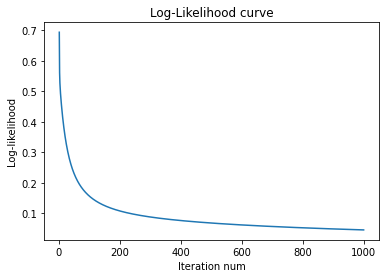

In [ ]:

# Plot the loss curve
plt.plot([i+1 for i in range(len(model.likelihoods))], model.likelihoods)
plt.title("Log-Likelihood curve")
plt.xlabel("Iteration num")
plt.ylabel("Log-likelihood")
plt.show()

In [ ]:
y_train_pred = model.predict(X_train)

[1.25019558e-212 1.12795795e-195 4.25992456e-190 0.00000000e+000
 7.58973534e-274 5.30097113e-077 9.45617915e-158 0.00000000e+000
 1.38591124e-240 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.05841992e-225 2.34132441e-250 8.16836800e-246 3.91672317e-256
 9.86976495e-196 0.00000000e+000 0.00000000e+000 0.00000000e+000
 5.39387845e-220 0.00000000e+000 8.88280516e-237 0.00000000e+000
 5.12002545e-247 0.00000000e+000 0.00000000e+000 0.00000000e+000
 6.76875141e-153 4.95226492e-159 0.00000000e+000 0.00000000e+000
 0.00000000e+000 8.74990266e-225 1.71342540e-197 9.16198185e-203
 2.26464698e-198 1.24126136e-175 0.00000000e+000 0.00000000e+000
 0.00000000e+000 2.40656580e-238 0.00000000e+000 0.00000000e+000
 2.75019754e-202 1.70492246e-261 0.00000000e+000 8.39921822e-167
 0.00000000e+000 2.56172649e-167 0.00000000e+000 0.00000000e+000
 7.88872116e-246 3.11951521e-165 2.48447504e-196 1.61594838e-217
 9.89621345e-224 1.28144998e-092 1.98050104e-146 4.91588967e-195
 8.23455248e-257 4.912033

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


In [ ]:
def accuracy(y_true,y_pred):
    '''Compute accuracy.
    Accuracy = (Correct prediction / number of samples)
    Args:
        y_true : Truth binary values (num_examples, )
        y_pred : Predicted binary values (num_examples, )
    Returns:
        accuracy: scalar value
    '''
    
    ### START CODE HERE
    
    accuracy = sum([1 for i in range(len(y_true)) if y_true[i]==y_pred[i]])/len(y_true) * 100
    ### END CODE HERE
    return accuracy

In [ ]:
 #Print accuracy on train data
 accuracy(y_train,y_train_pred)

52.21238938053098

In [ ]:
# Print accuracy on test data
y_test_predict=model.predict(X_test)
accuracy(y_test,y_test_predict)

[0.00000000e+000 6.41089807e-121 0.00000000e+000 0.00000000e+000
 6.22154441e-238 1.19359422e-097 4.74572774e-189 0.00000000e+000
 1.01119666e-203 5.06673212e-197 0.00000000e+000 0.00000000e+000
 2.32556975e-106 2.93783619e-143 0.00000000e+000 8.33129074e-184
 9.70181345e-196 1.72565350e-268 5.39387845e-220 6.55947992e-230
 0.00000000e+000 0.00000000e+000 1.02345059e-155 0.00000000e+000
 4.54016995e-194 0.00000000e+000 1.12448540e-105 0.00000000e+000
 3.85335252e-169 0.00000000e+000 0.00000000e+000 7.81147207e-238
 0.00000000e+000 1.15249487e-149 0.00000000e+000 0.00000000e+000
 0.00000000e+000 4.50778533e-209 0.00000000e+000 0.00000000e+000
 0.00000000e+000 2.73405342e-240 0.00000000e+000 4.26711907e-055
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 4.41216797e-216 0.00000000e+000 6.94335007e-242
 0.00000000e+000 1.96280634e-244 1.85425528e-248 0.00000000e+000
 8.48215345e-242]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


47.368421052631575

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize the model from sklearn
model =LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
# Fit the model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

# Predict on testing set X_test
y_pred =model.predict(X_test)

In [ ]:
# Print Accuracy on testing set
test_accuracy_sklearn = accuracy_score(y_test,y_pred)*100

print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")


Accuracy on testing set: 96.49122807017544
